In [1]:
import pandas as pd
import numpy as np

In [2]:
datar = pd.read_csv('data/rawdata/2015r.txt',sep=';')
datar.columns = np.array([str(i).strip().replace(' ','_') for i in list(datar.columns.values)])
datar = datar[['Tournament_Year','Tournament_#','Permanent_Tournament_#','Course_#','Player_Number','Player_Name','Round_Number',
               'Tee_Time','Round_Score','End_of_Event_Pos._(text)']]

/Users/adamlevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (22,43,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
datar.head()

,Tournament_Year,Tournament_#,Permanent_Tournament_#,Course_#,Player_Number,Player_Name,Round_Number,Tee_Time,Round_Score,End_of_Event_Pos._(text)
0,2015,10,464,552,1706,"Love III, Davis",1,07:35,77,CUT
1,2015,10,464,552,2239,"Verplank, Scott",1,08:15,73,CUT
2,2015,10,464,552,6567,"Singh, Vijay",1,12:55,72,CUT
3,2015,10,464,552,8075,"Kelly, Jerry",1,13:25,69,T39
4,2015,10,464,552,8725,"Gillis, Tom",1,07:15,70,T26


In [11]:
from collections import defaultdict
d = defaultdict(list)
for tup,df in datar.groupby(['Player_Number','Permanent_Tournament_#']): 
    d['Player_Number'].append(df.iloc[0].Player_Number)
    d['Permanent_Tournament_#'].append(df.iloc[0]['Permanent_Tournament_#'])
    for r in range(1,7):
        try:
            d['Round_%d_Score' % r].append(df[df.Round_Number==r].Round_Score.values[0])
        except:
            d['Round_%d_Score' % r].append(np.nan)
    d['Total_Strokes'].append(df.Round_Score.sum())

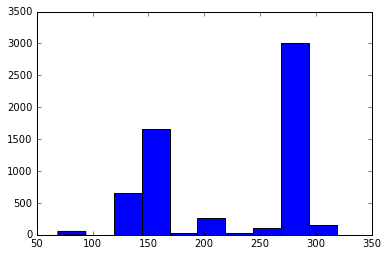

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(pd.DataFrame(d).Total_Strokes);